In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist.data

In [4]:
X.shape

(70000, 784)

In [8]:
X.loc[2022]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 2022, Length: 784, dtype: float64

In [9]:
y = mnist.target

In [12]:
y.loc[2022]

'2'

In [13]:
X.loc[2022].mean()

27.761479591836736

In [14]:
(X.loc[2022] == 0).sum()

643

In [15]:
xtrain, xtest, ytrain, ytest = X.iloc[:10_000], X.iloc[10_000:12_000], y.iloc[:10_000], y.iloc[10_000:12_000]

In [16]:
[c.shape for c in (xtrain, xtest, ytrain, ytest)]

[(10000, 784), (2000, 784), (10000,), (2000,)]

In [19]:
import pandas as pd

In [21]:
sixes_train = xtrain.iloc[ytrain.values == '6']
nines_train = xtrain.iloc[ytrain.values == '9']
six_nine_train = pd.concat((sixes_train, nines_train), axis=0)

sixes_test = xtest.iloc[ytest.values == '6']
nines_test = xtest.iloc[ytest.values == '9']
six_nine_test = pd.concat((sixes_test, nines_test), axis=0)

In [23]:
ytrain[ytrain.values == '6']

13      6
18      6
32      6
36      6
39      6
       ..
9943    6
9946    6
9961    6
9967    6
9997    6
Name: class, Length: 1014, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [27]:
y_69_train = pd.concat((ytrain[ytrain.values == '6'], ytrain[ytrain.values == '9']), axis=0)
y_69_test = pd.concat((ytest[ytest.values == '6'], ytest[ytest.values == '9']), axis=0)

In [30]:
six_nine_train.shape

(1992, 784)

In [31]:
y_69_train.shape

(1992,)

In [32]:
six_nine_test.shape

(409, 784)

In [33]:
y_69_test.shape

(409,)

In [34]:
y_69_test = y_69_test.astype(int)
y_69_train = y_69_train.astype(int)

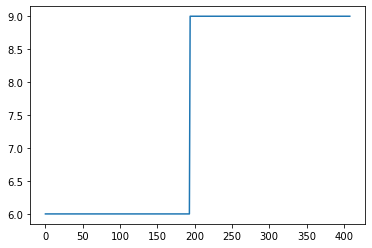

In [37]:
import matplotlib.pyplot as plt
plt.plot(y_69_test.values)

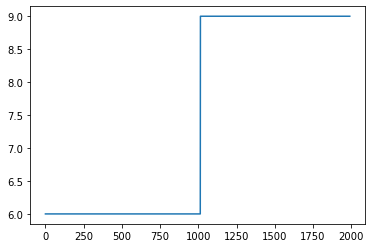

In [38]:
plt.plot(y_69_train.values)

In [39]:
y_69_train.loc[y_69_train == 6] = 1
y_69_train.loc[y_69_train == 9] = -1

y_69_test.loc[y_69_test == 6] = 1
y_69_test.loc[y_69_test == 9] = -1

In [40]:
from sklearn.utils import shuffle

In [44]:
xtrain, ytrain = shuffle(six_nine_train, y_69_train, random_state=1729)
xtest, ytest = shuffle(six_nine_test, y_69_test, random_state=1729)

In [46]:
ytrain.head()

2880    1
1147   -1
9825   -1
4307   -1
5587    1
Name: class, dtype: int64

In [47]:
from sklearn.linear_model import Perceptron

In [49]:
perc = Perceptron(random_state=1729, eta0=1, max_iter=10, shuffle=False, alpha=0)

In [50]:
perc.fit(xtrain.values, ytrain.values)

/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0, eta0=1, max_iter=10, random_state=1729, shuffle=False)

In [54]:
perc.coef_.ravel()[69]

605.0

In [56]:
perc.intercept_

array([-6.])

In [58]:
perc = Perceptron(random_state=1729, eta0=1, max_iter=1, shuffle=False, alpha=0, warm_start=True)
for i in range(5):
    perc.fit(xtrain.values, ytrain.values)
    print(perc.intercept_)

[-1.]
[-4.]
[-4.]
[-6.]
[-5.]


/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/jaidevd/conda/